# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Dataset

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

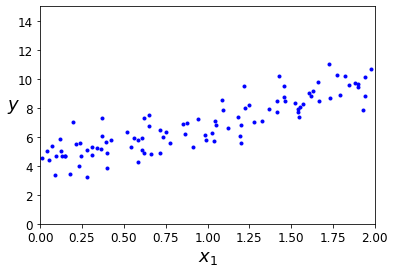

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

# Batch Gradient Descent 구현 예시

In [6]:
eta = 0.1  # learning rate
n_iterations = 50 # n_iterations 변경

m = 100

theta = np.random.randn(2,1)  # random initialization

loss_bgd = []
for iteration in range(n_iterations):
    loss = np.sqrt((1/m)*(X_b.dot(theta)-y).T.dot(X_b.dot(theta)-y).squeeze()) # RMSE 계산. squeeze는 array를 scalar로 변환하기 위함.
    loss_bgd.append(loss)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

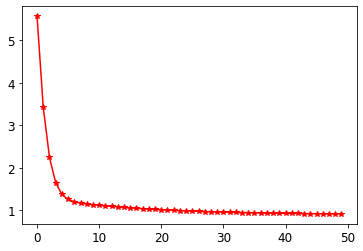

In [7]:
plt.plot(loss_bgd, marker = '*', color = 'r')

# Batch Gradient Descent with different $\eta$


In [8]:
loss_path_bgd = [] # loss_path_bgd 생성

def plot_loss(theta, eta, loss_path=None):
    m = len(X_b)
    n_iterations = 50
    loss_path_bgd_plot = [] # plot용 loss_path_bgd 생성
    for iteration in range(n_iterations):
        loss = np.sqrt((1/m)*(X_b.dot(theta)-y).T.dot(X_b.dot(theta)-y).squeeze()) # RMSE, squeeze는 array를 scalar변환하기 위함
        loss_path_bgd_plot.append(loss) # RMSE를 loss_path_bgd_plot에 저장
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if loss_path is not None: # loss_path를 지정할 경우
            loss_path.append(loss) # loss_path_bgd_plot를 loss_path에 저장
    plt.plot(loss_path_bgd_plot, marker = '*', color = 'r') # loss function 그리기
    plt.xlabel("$n\_iterations$", fontsize=12)
    plt.axis([0, 50, 0, 20])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

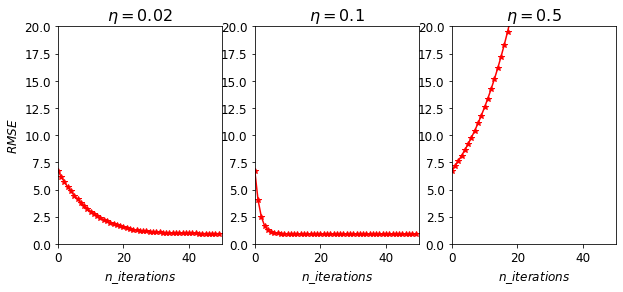

In [9]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); 
plot_loss(theta, eta=0.02) # eta=0.02일 때 plot_loss
plt.ylabel("$RMSE$", rotation=90, fontsize=12)
plt.subplot(132); 
plot_loss(theta, eta=0.1, loss_path=loss_path_bgd) # eta=0.1일 때 plot_loss, loss_path를 loss_path_bgd에 저장하기.
plt.subplot(133); 
plot_loss(theta, eta=0.5) # eta=0.5일 때 plot_loss
plt.show()

# Stochastic Gradient Descent

In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
print(m)

100


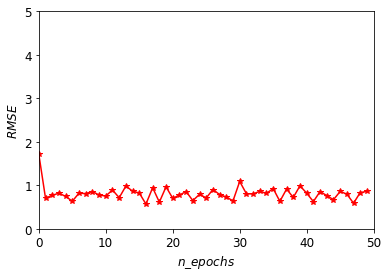

In [11]:
n_epochs = 50

t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1) 

theta = np.random.randn(2,1)  # random initialization

loss_path_sgd = []# loss_path_sgd 리스트 생성
for epoch in range(n_epochs):
    loss_i = []# RMSE 계산을 위해 개별 잔차제곱값을 저장할 리스트 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        loss = (xi.dot(theta)-yi)**2
        loss_i.append(loss)# 잔차제곱값을 loss_i에 저장
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    loss_path_sgd.append(np.sum(loss_i) / m) # 잔차제곱값을 평균 후 loss_path_sgd에 저장.

plt.plot(loss_path_sgd, marker = '*', color = 'r')
plt.xlabel("$n\_epochs$", fontsize=12)                     # not shown
plt.ylabel("$RMSE$", rotation=90, fontsize=12)           # not shown
plt.axis([0, 50, 0, 5])                              # not shown
plt.show()                                           # not shown

# Mini-batch Gradient Descent

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

loss_path_mgd = []# loss_path_mgd 리스트 생성

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    loss_batch = [] # mini_batch당 계산되는 loss 저장하는 리스트 생성
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        loss = np.sum((xi.dot(theta)-yi)**2)
        loss_batch.append(loss) # mini_batch당 loss 저장 
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    loss_path_mgd.append(np.sum(loss_batch) / minibatch_size) # RMSE 계산 뒤 loss_path_mgd에 저장

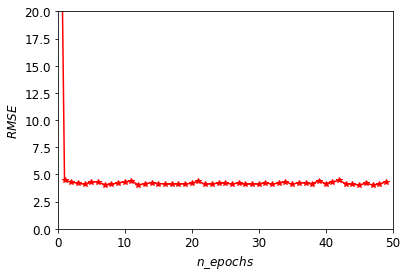

In [29]:
plt.plot(loss_path_mgd, marker = '*', color = 'r')# loss_path_mgd 그리기
plt.xlabel("$n\_epochs$", fontsize=12)                     # not shown
plt.ylabel("$RMSE$", rotation=90, fontsize=12)           # not shown
plt.axis([0, 50, 0, 20])                              # not shown
plt.show()  

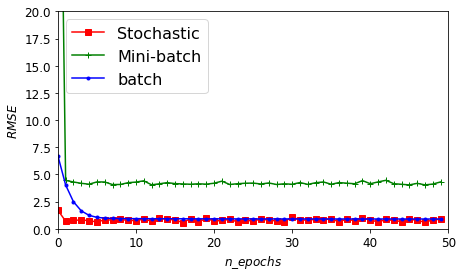

In [31]:
plt.figure(figsize=(7,4))
plt.plot(loss_path_sgd, marker = 's', color = 'r', label = 'Stochastic')
plt.plot(loss_path_mgd, marker = '+', color = 'g', label = 'Mini-batch')
plt.plot(loss_path_bgd, marker = '.', color = 'b', label = 'batch')
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$n\_epochs$", fontsize=12)
plt.ylabel(r"$RMSE$", fontsize=12, rotation=90)
plt.axis([0, 50, 0, 20])
plt.show()